In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# About the dataset

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.


### Data Description ###

- `url` : This feature contains the url of the restaurant on the Zomato website
- `address` : This feature contains the address of the restaurant in Bangalore
- `name` : This feature contains the name of the restaurant
- `online_order` : whether online ordering is available in the restaurant or not
- `book_table` : table book option available or not
- `rate` : contains the overall rating of the restaurant out of 5
- `votes` : contains total number of upvotes for the restaurant
- `phone` : contains the phone number of the restaurant
- `location` : contains the neighborhood in which the restaurant is located
- `rest_type` : restaurant type
- `dish_liked` : dishes people liked in the restaurant
- `cuisines` : food styles, separated by comma
- `approx_cost(for two people)` : contains the approximate cost of meal for two people
- `reviews_list` : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
- `menu_item` : contains list of menus available in the restaurant
- `listed_in(type)` : type of meal
- `listed_in(city)` : contains the neighborhood in which the restaurant is located

 Reading the Dataset

In [2]:
df = pd.read_csv('/config/workspace/zomato.csv')

In [3]:
print(f"Shape of the dataset: {df.shape} ")

Shape of the dataset: (51717, 17) 


In [4]:
# first 5 rows in the dataset
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.describe() #descriptive statistics of a DataFrame

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
# columns (features) in dataset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
# dropping the unnecessary columns
df.drop(['url','phone','dish_liked'],axis=1,inplace=True)

In [9]:
# checking duplicated rows in the dataset
df.duplicated().sum()

43

In [10]:
# dropping the duplicated rows from the dataset
df.drop_duplicates(inplace=True)

In [11]:
# check for missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

rate                           7767
approx_cost(for two people)     345
rest_type                       227
cuisines                         45
location                         21
address                           0
name                              0
online_order                      0
book_table                        0
votes                             0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [12]:
print("Missing values in rate:",round((df['rate'].isnull().sum()/df.shape[0])*100,2))
print("Missing values in approx_cost(for two people):",round((df['approx_cost(for two people)'].isnull().sum()/df.shape[0])*100,2))
print("Missing values in rest_type:",round((df['rest_type'].isnull().sum()/df.shape[0])*100,2))
print("Missing values in cuisines:",round((df['cuisines'].isnull().sum()/df.shape[0])*100,2))
print("Missing values in location:",round((df['location'].isnull().sum()/df.shape[0])*100,2))


Missing values in rate: 15.03
Missing values in approx_cost(for two people): 0.67
Missing values in rest_type: 0.44
Missing values in cuisines: 0.09
Missing values in location: 0.04


In [13]:
# dropping the null values from the dataset
df.dropna(how='any', inplace=True)

# The how argument specifies how to determine which values should be considered missing. 
# If how='any', then any row containing at least one missing value will be dropped.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [15]:
df['approx_cost(for two people)'].value_counts()

300      5707
400      5531
500      4295
200      3515
600      3341
         ... 
560         1
360         1
5,000       1
3,700       1
160         1
Name: approx_cost(for two people), Length: 66, dtype: int64

In [16]:
df['listed_in(type)'].value_counts()

Delivery              21632
Dine-out              14831
Desserts               2849
Cafes                  1589
Drinks & nightlife     1073
Buffet                  865
Pubs and bars           660
Name: listed_in(type), dtype: int64

In [17]:
print("Total Cities in the dataset:",df['listed_in(city)'].nunique())

df['listed_in(city)'].value_counts()

Total Cities in the dataset: 30


BTM                      2749
Koramangala 7th Block    2475
Koramangala 5th Block    2377
Koramangala 4th Block    2353
Koramangala 6th Block    2253
Jayanagar                1994
JP Nagar                 1764
Indiranagar              1656
Church Street            1569
MG Road                  1551
Brigade Road             1537
Lavelle Road             1490
HSR                      1445
Residency Road           1378
Marathahalli             1346
Bannerghatta Road        1324
Brookefield              1249
Whitefield               1249
Old Airport Road         1227
Basavanagudi             1140
Kalyan Nagar             1072
Kammanahalli             1066
Sarjapur Road            1055
Bellandur                1030
Frazer Town               993
Malleshwaram              974
Electronic City           938
Rajajinagar               895
Banashankari              766
New BEL Road              584
Name: listed_in(city), dtype: int64

In [18]:
# renaming the column names
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [19]:
# checking the datatype for the columns
df.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [20]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
# only rate, votes and cost has numarical datatypes

df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [22]:
# data transformation
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) # removing ',' from cost 
df['cost']=df['cost'] # converting the cost column to int32
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43499 non-null  object
 1   name          43499 non-null  object
 2   online_order  43499 non-null  object
 3   book_table    43499 non-null  object
 4   rate          43499 non-null  object
 5   votes         43499 non-null  int64 
 6   location      43499 non-null  object
 7   rest_type     43499 non-null  object
 8   cuisines      43499 non-null  object
 9   cost          43499 non-null  object
 10  reviews_list  43499 non-null  object
 11  menu_item     43499 non-null  object
 12  type          43499 non-null  object
 13  city          43499 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [24]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
# we have 719 restaurant without rating
df[df['rate']=='NEW']['name'].nunique()

719

In [26]:
# changin the datype for votes
df['votes'] = df['votes'].astype('int32')

In [27]:
# removing '/5' from rate column

# Filter rows where the value in the "rate" column is not "NEW"
df = df.loc[df.rate != 'NEW']

# Filter rows where the value in the "rate" column is not "-"
df = df.loc[df.rate != '-'].reset_index(drop=True)

# Define a lambda function to remove "/5" from the "rate" column
df['rate'] = df['rate'].replace(r'[^\S]|/5', '', regex=True).replace(r'-|NEW|nan',np.nan, regex=True)

In [28]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [29]:
df['rate'].describe()

count     41237
unique       31
top         3.9
freq       3954
Name: rate, dtype: object

In [30]:
# changing the datatype
df.rate = df.rate.astype('float')

In [31]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  object 
 3   book_table    41237 non-null  object 
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int32  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  object 
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(1), int32(1), object(12)
memory usage: 4.2+ MB


In [33]:
# changing the datatype for cost column
df['cost'] = df['cost'].astype('int32')

In [34]:
# menu column have 73% blank rows
round((df[df['menu_item'] =='[]'].shape[0]/df.shape[0])*100,2)

73.52

In [35]:
# adjusting the column names
df['name'] = df['name'].apply(lambda x:x.title())
df['name'].head()

0                    Jalsa
1           Spice Elephant
2          San Churro Cafe
3    Addhuri Udupi Bhojana
4            Grand Village
Name: name, dtype: object

In [36]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [37]:
df['menu_item'] = df['menu_item'].replace('[]','menu_not_availabel')

In [38]:
df[df['menu_item']=='menu_not_availabel']

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",menu_not_availabel,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",menu_not_availabel,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",menu_not_availabel,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",menu_not_availabel,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",menu_not_availabel,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",menu_not_availabel,Pubs and bars,Whitefield
41233,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",menu_not_availabel,Pubs and bars,Whitefield
41234,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",menu_not_availabel,Pubs and bars,Whitefield
41235,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",menu_not_availabel,Pubs and bars,Whitefield


In [39]:
# saving copy of cleaned dataset
df.to_csv('zomato_cleaned.csv')

In [40]:
def Encode(df):
    # Initialize the LabelEncoder object
    le = LabelEncoder()
    
    # Iterate through columns in the DataFrame
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        # Fit and transform the categorical column using LabelEncoder
        df[column] = le.fit_transform(df[column])
    # Return the encoded DataFrame
    return df

# Create a copy of the original DataFrame
df_en = Encode(df.copy())
# Show the first few rows of the encoded DataFrame
df_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,6263,2769,1,1,4.1,775,1,24,1894,800,10169,8242,0,1
1,3004,5250,1,0,4.1,787,1,24,816,800,11804,8242,0,1
2,614,4839,1,0,3.8,918,1,19,653,800,4272,8242,0,1
3,1964,131,0,0,3.7,88,1,73,2221,300,8667,8242,0,1
4,274,2243,0,0,3.8,166,4,24,1921,600,14637,8242,0,1


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

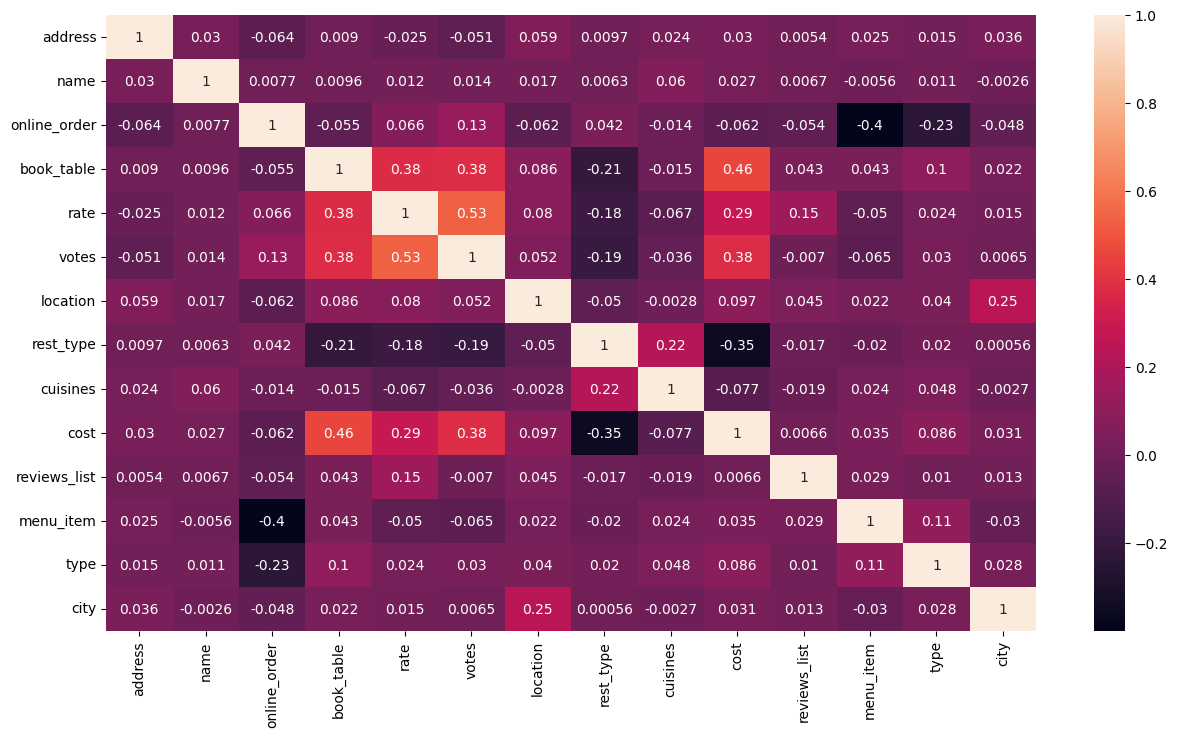

In [41]:
# Calculate the Kendall rank correlation matrix of the encoded DataFrame
corr = df_en.corr(method='kendall')

# Set the size of the figure for the heatmap
plt.figure(figsize=(15,8))

# Create a heatmap of the Kendall rank correlation matrix using the seaborn library
sns.heatmap(corr, annot=True)

# list of columns
df_en.columns

In [42]:
df['online_order'].value_counts()

Yes    27081
No     14156
Name: online_order, dtype: int64

Yes    27081
No     14156
Name: online_order, dtype: int64

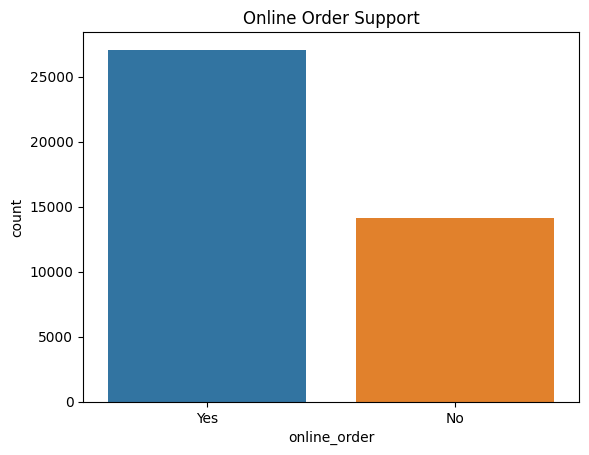

In [43]:
# maximum restuarants support online order
sns.countplot(x=df['online_order'], data=df).set(title='Online Order Support')
df['online_order'].value_counts()

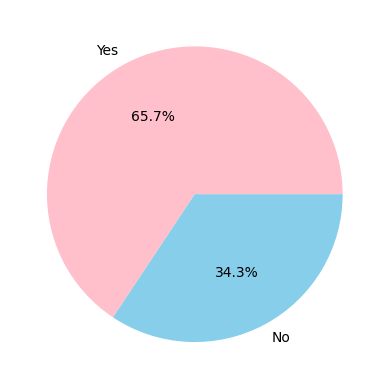

In [44]:
palette_color = ['pink', 'skyblue']
labels =['Accepted', 'Not Accepted']
values = df['online_order'].value_counts().values

plt.pie(values, labels=df['online_order'].unique(), colors=palette_color, autopct='%1.1f%%')
plt.show()

In [45]:
df['cuisines'].nunique()

2367

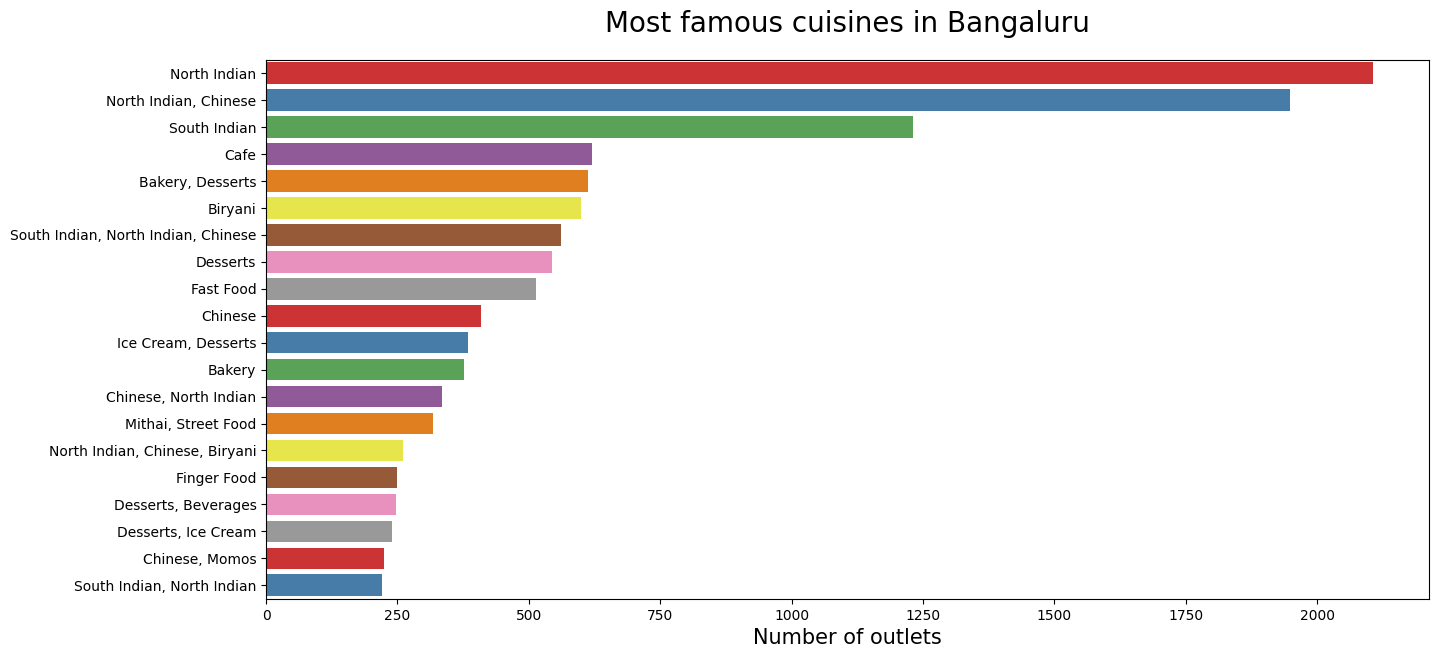

In [46]:
plt.figure(figsize=(15,7))
chains=df['cuisines'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous cuisines in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()

### North Indian is Most famous cuisines in Bangaluru

In [47]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

Yes    27081
No     14156
Name: online_order, dtype: int64

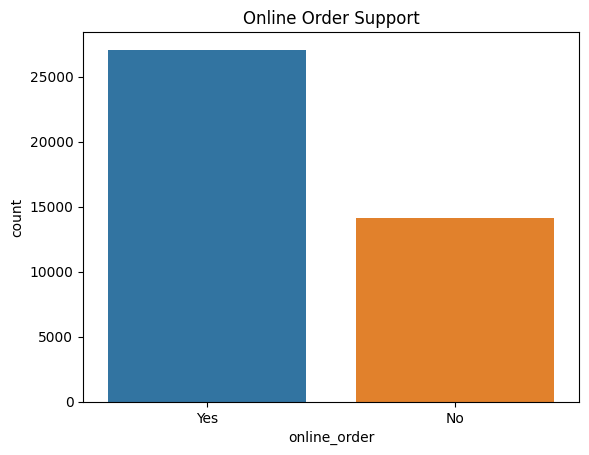

In [48]:
# maximum restuarants support online order
sns.countplot(x=df['online_order'], data=df).set(title='Online Order Support')
df['online_order'].value_counts()

No     34938
Yes     6299
Name: book_table, dtype: int64

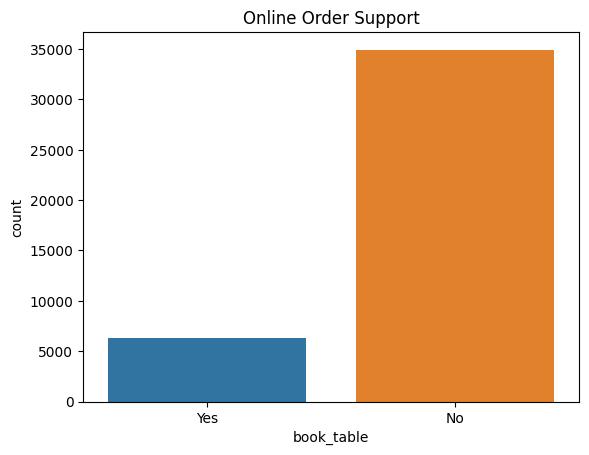

In [49]:
sns.countplot(x=df['book_table'], data=df).set(title='Online Order Support')
df['book_table'].value_counts()